 Final Project 

Part one: Importing Dependencies 

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
from pandas import DataFrame
from pandas import Series
from scipy.stats import linregress
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
import csv
import os 
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
#from datasist.structdata import detect_outliers
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
#import category_encoders as ce
import re 

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
#from xgboost import XGBClassifier
from sklearn.metrics import classification_report 
import joblib

# Packages options 
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all 
np.seterr(divide='ignore', invalid='ignore', over='ignore') ;

import warnings 
warnings.filterwarnings("ignore")

C:\Users\jreed\anaconda3\Lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Loading Data

In [2]:
credit_class_df= pd.read_csv('Credit Score Classification Dataset.csv')
credit_class_df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [3]:
print(credit_class_df['Credit Score'])

0         High
1         High
2         High
3         High
4         High
        ...   
159        Low
160    Average
161       High
162       High
163       High
Name: Credit Score, Length: 164, dtype: object


In [4]:
credit_class_df.dropna(axis= 1, inplace=True)

In [5]:
credit_class_df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [6]:
credit_class_df['Credit Score'] = credit_class_df['Credit Score'].apply( lambda x: 2 if x in ['High'] else (1 if x in ['Average'] else 0) )

In [7]:
credit_class_df['Credit Score'].value_counts()

Credit Score
2    113
1     36
0     15
Name: count, dtype: int64

In [8]:
credit_dummies = pd.get_dummies(credit_class_df)

In [9]:
credit_dummies.head()

,Age,Income,Number of Children,Credit Score,Gender_Female,Gender_Male,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree,Marital Status_Married,Marital Status_Single,Home Ownership_Owned,Home Ownership_Rented
0,25,50000,0,2,True,False,False,True,False,False,False,False,True,False,True
1,30,100000,2,2,False,True,False,False,False,False,True,True,False,True,False
2,35,75000,1,2,True,False,False,False,True,False,False,True,False,True,False
3,40,125000,0,2,False,True,False,False,False,True,False,False,True,True,False
4,45,100000,3,2,True,False,False,True,False,False,False,True,False,True,False


In [10]:
credit_dummies.columns

Index(['Age', 'Income', 'Number of Children', 'Credit Score', 'Gender_Female',
       'Gender_Male', 'Education_Associate's Degree',
       'Education_Bachelor's Degree', 'Education_Doctorate',
       'Education_High School Diploma', 'Education_Master's Degree',
       'Marital Status_Married', 'Marital Status_Single',
       'Home Ownership_Owned', 'Home Ownership_Rented'],
      dtype='object')

In [11]:
credit_dummies[['Gender_Female',
       'Gender_Male', "Education_Associate's Degree",
       "Education_Bachelor's Degree", 'Education_Doctorate',
       "Education_High School Diploma", "Education_Master's Degree",
       "Marital Status_Married", 'Marital Status_Single',
       'Home Ownership_Owned', 'Home Ownership_Rented']]= credit_dummies[['Gender_Female',
       'Gender_Male', "Education_Associate's Degree",
       "Education_Bachelor's Degree", 'Education_Doctorate',
       "Education_High School Diploma", "Education_Master's Degree",
       "Marital Status_Married", 'Marital Status_Single',
       'Home Ownership_Owned', 'Home Ownership_Rented']].astype(int)
       

In [12]:
credit_dummies.head()

,Age,Income,Number of Children,Credit Score,Gender_Female,Gender_Male,Education_Associate's Degree,Education_Bachelor's Degree,Education_Doctorate,Education_High School Diploma,Education_Master's Degree,Marital Status_Married,Marital Status_Single,Home Ownership_Owned,Home Ownership_Rented
0,25,50000,0,2,1,0,0,1,0,0,0,0,1,0,1
1,30,100000,2,2,0,1,0,0,0,0,1,1,0,1,0
2,35,75000,1,2,1,0,0,0,1,0,0,1,0,1,0
3,40,125000,0,2,0,1,0,0,0,1,0,0,1,1,0
4,45,100000,3,2,1,0,0,1,0,0,0,1,0,1,0


In [13]:
X, y = credit_dummies.drop('Credit Score',axis=1).values , credit_dummies['Credit Score'] 

In [14]:
y.value_counts(normalize=True)

Credit Score
2    0.689024
1    0.219512
0    0.091463
Name: proportion, dtype: float64

In [15]:
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy='auto')
X_data_rus, y_data_rus = rus.fit_resample(X, y)

In [16]:
y_data_rus.value_counts(normalize=True)

Credit Score
2    0.333333
1    0.333333
0    0.333333
Name: proportion, dtype: float64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_data_rus, y_data_rus, test_size=0.3, random_state=42,stratify=y_data_rus)

In [18]:
scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)

In [19]:
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

#  building a stacked ensemble model using different classifiers in Python. Stacked ensemble models combine the predictions of multiple base models to improve overall predictive performance.

In [20]:
import xgboost as xgb
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
randomForest = RandomForestClassifier(n_jobs=-1)
histGradientBoosting = HistGradientBoostingClassifier()
XGB = xgb.XGBClassifier(n_jobs=-1)

model = StackingClassifier([
    ('bagging', bagging),
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradientBoosting', histGradientBoosting),
    ('XGB', XGB)
], n_jobs=-1)

In [21]:
model.fit(X_train, y_train)

StackingClassifier(estimators=[('bagging', BaggingClassifier(n_jobs=-1)),
                               ('extraTress',
                                ExtraTreesClassifier(max_depth=10, n_jobs=-1)),
                               ('randomforest',
                                RandomForestClassifier(n_jobs=-1)),
                               ('histGradientBoosting',
                                HistGradientBoostingClassifier()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None...
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=-1,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   n_jobs=-1)

In [22]:
print("Train Score: ",model.score(X_train, y_train))

Train Score:  1.0


In [23]:
print("Test Score: ",model.score(X_test, y_test))

Test Score:  1.0


In [24]:
y_pred = model.predict(X_test)

In [25]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        34

    accuracy                           1.00       102
   macro avg       1.00      1.00      1.00       102
weighted avg       1.00      1.00      1.00       102



In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
cf_test_matrix = confusion_matrix(y_test, y_pred)
cf_test_matrix  

array([[34,  0,  0],
       [ 0, 34,  0],
       [ 0,  0, 34]], dtype=int64)

In [27]:
test_df = pd.read_csv('test.csv')
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [28]:
credit_df = pd.read_csv('credit_risk_dataset.csv')
credit_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [29]:
credit_scoring_df = pd.read_csv('credit_scoring.csv')
credit_scoring_df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828,2,3289000,6.28,36,Personal Loan


Data Cleaning

In [30]:
test_df.dropna(inplace=True)
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.986667,2,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783


In [31]:
credit_df.dropna(inplace=True)
credit_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [32]:
credit_scoring_df.dropna(inplace=True)
credit_scoring_df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371,2,4731000,6.57,60,Auto Loan
4,32,Male,Married,Bachelor,Self-Employed,0.99,828,2,3289000,6.28,36,Personal Loan


In [33]:
credit_class_df.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [34]:
test_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [35]:
credit_df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [36]:
credit_scoring_df.columns

Index(['Age', 'Gender', 'Marital Status', 'Education Level',
       'Employment Status', 'Credit Utilization Ratio', 'Payment History',
       'Number of Credit Accounts', 'Loan Amount', 'Interest Rate',
       'Loan Term', 'Type of Loan'],
      dtype='object')

In [37]:
credit_scoring_df.dtypes

Age                            int64
Gender                        object
Marital Status                object
Education Level               object
Employment Status             object
Credit Utilization Ratio     float64
Payment History                int64
Number of Credit Accounts      int64
Loan Amount                    int64
Interest Rate                float64
Loan Term                      int64
Type of Loan                  object
dtype: object

In [38]:
credit_df.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [39]:
test_df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
dtype: object

In [40]:
print("Total categories in the feature Gender:\n", credit_class_df["Gender"].value_counts(), "\n")

print("Total categories in the feature Education:\n", credit_class_df["Education"].value_counts(),"\n")

print("Total categories in the feature Marital_Status:\n", credit_class_df["Marital Status"].value_counts(), "\n")

print("Total categories in the feature Home Ownership:\n", credit_class_df["Home Ownership"].value_counts(), "\n")

print("Total categories in the feature Credit Score:\n", credit_class_df["Credit Score"].value_counts(), "\n")

Total categories in the feature Gender:
 Gender
Female    86
Male      78
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: count, dtype: int64 

Total categories in the feature Marital_Status:
 Marital Status
Married    87
Single     77
Name: count, dtype: int64 

Total categories in the feature Home Ownership:
 Home Ownership
Owned     111
Rented     53
Name: count, dtype: int64 

Total categories in the feature Credit Score:
 Credit Score
2    113
1     36
0     15
Name: count, dtype: int64 



In [41]:
print("Total categories in the feature Payment History:\n", credit_scoring_df["Payment History"].value_counts(), "\n")


print("Total categories in the feature Credit Utilization:\n", credit_scoring_df["Credit Utilization Ratio"].value_counts(), "\n")

Total categories in the feature Payment History:
 Payment History
2628    17
2800    17
2085    17
514     16
857     15
        ..
2171     5
28       5
400      4
628      4
2257     3
Name: count, Length: 101, dtype: int64 

Total categories in the feature Credit Utilization:
 Credit Utilization Ratio
0.74    24
0.66    18
0.96    17
0.60    17
0.08    16
        ..
0.09     5
0.23     4
0.25     3
0.00     3
0.83     3
Name: count, Length: 101, dtype: int64 



# 
The relationship between payment history and credit card utilization is crucial in determining an individual's creditworthiness and overall financial health. Here are some key points to consider when exploring this relationship:

Credit Score Impact: Payment history and credit card utilization are two significant factors that influence credit scores. Payment history accounts for a significant portion of a credit score, typically around 35%, while credit card utilization ratio (the amount of credit used compared to the total credit available) accounts for about 30%. Timely payments and low credit card utilization can positively impact credit scores.

Financial Responsibility: A history of making on-time payments reflects financial responsibility and reliability. Lenders and credit card companies view individuals with a positive payment history as lower credit risks. Similarly, maintaining a low credit card utilization ratio demonstrates responsible credit management and can contribute to a positive credit profile.

Creditworthiness: Lenders assess payment history and credit card utilization to evaluate an individual's creditworthiness when applying for loans, mortgages, or new credit cards. Consistently making timely payments and keeping credit card balances low indicate a borrower's ability to manage credit responsibly, increasing their chances of loan approval and favorable terms.

Debt Management: Payment history and credit card utilization are indicators of how well an individual manages their debt. Making late payments or maxing out credit cards can signal financial distress and may lead to higher interest rates, lower credit limits, and potential credit score damage. Effective debt management involves maintaining a positive payment history and using credit cards responsibly.

Impact on Interest Rates: Individuals with a strong payment history and low credit card utilization ratios are likely to qualify for lower interest rates on loans and credit cards. Lenders may offer preferential rates to borrowers with a history of on-time payments and prudent credit card usage, leading to cost savings over time.

Credit Limit Considerations: High credit card utilization can negatively impact credit scores and signal a higher risk of default. Keeping credit card balances low relative to credit limits demonstrates financial discipline and can help individuals maintain a healthy credit profile. Monitoring credit card utilization and payment history is essential for managing credit effectively.

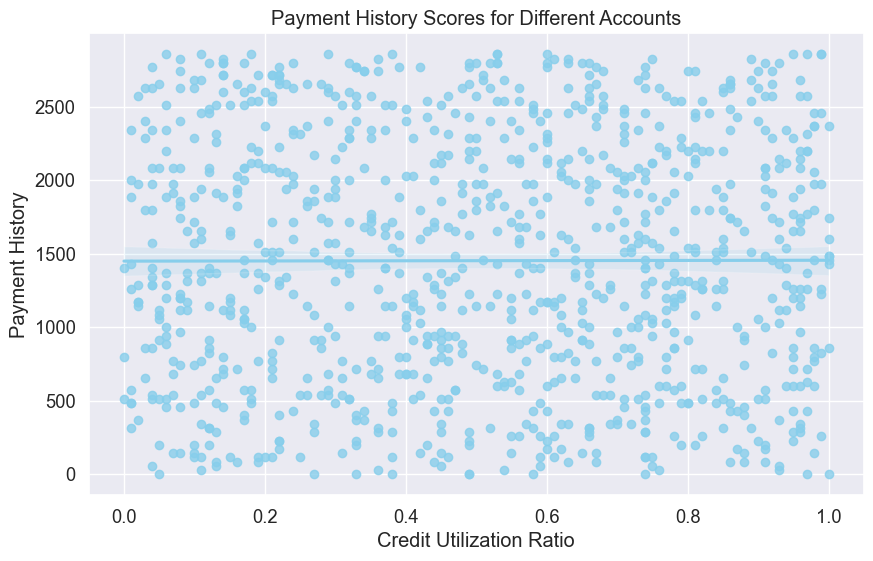

In [87]:
#sns.regplot(x=credit_scoring_df['Number of Credit Accounts'], y=credit_scoring_df['Payment History'])

plt.figure(figsize=(10, 6))
sns.regplot(x='Credit Utilization Ratio', y='Payment History', data=credit_scoring_df, color='skyblue')

# Add labels and title
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Payment History')
plt.title('Payment History Scores for Different Accounts')

# Show the bar graph
plt.show()

In [43]:
#Rename the test dateFrame columns 
test_df.rename(columns = {'Credit_Utilization_Ratio':'Credit Utilization Ratio'}, inplace=True)
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit Utilization Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.986667,2,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783


In [44]:
#Rename credit risk column
credit_df.rename(columns = {'loan_int_rate':'Interest_Rate'}, inplace=True)
credit_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,Interest_Rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [45]:
#Rename credit risk column 
credit_df.rename(columns = {'person_income':'Annual_Income'}, inplace=True)
credit_df.head()

,person_age,Annual_Income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,Interest_Rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [46]:
#merge the DataFrames

In [47]:
#Credit utilization of lesser than .30 , Optimal credit utilization
filtered_credit_scoring_df = credit_scoring_df.loc[credit_scoring_df["Credit Utilization Ratio"]<=.75]
filtered_credit_scoring_df.head()

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371,2,4731000,6.57,60,Auto Loan
6,44,Female,Divorced,Bachelor,Unemployed,0.32,2800,1,2021000,16.61,36,Auto Loan


In [48]:
filtered_credit_scoring_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 754 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        754 non-null    int64  
 1   Gender                     754 non-null    object 
 2   Marital Status             754 non-null    object 
 3   Education Level            754 non-null    object 
 4   Employment Status          754 non-null    object 
 5   Credit Utilization Ratio   754 non-null    float64
 6   Payment History            754 non-null    int64  
 7   Number of Credit Accounts  754 non-null    int64  
 8   Loan Amount                754 non-null    int64  
 9   Interest Rate              754 non-null    float64
 10  Loan Term                  754 non-null    int64  
 11  Type of Loan               754 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 76.6+ KB


In [49]:
filtered_credit_scoring_df

,Age,Gender,Marital Status,Education Level,Employment Status,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Type of Loan
0,60,Male,Married,Master,Employed,0.22,2685,2,4675000,2.65,48,Personal Loan
1,25,Male,Married,High School,Unemployed,0.20,2371,9,3619000,5.19,60,Auto Loan
2,30,Female,Single,Master,Employed,0.22,2771,6,957000,2.76,12,Auto Loan
3,58,Female,Married,PhD,Unemployed,0.12,1371,2,4731000,6.57,60,Auto Loan
6,44,Female,Divorced,Bachelor,Unemployed,0.32,2800,1,2021000,16.61,36,Auto Loan
...,...,...,...,...,...,...,...,...,...,...,...,...
994,53,Female,Single,Master,Employed,0.40,2028,4,2561000,3.26,36,Home Loan
995,59,Male,Divorced,High School,Employed,0.74,1285,8,3530000,12.99,48,Auto Loan
997,63,Female,Single,Master,Self-Employed,0.18,2628,10,2443000,18.95,12,Personal Loan
998,51,Female,Married,PhD,Self-Employed,0.32,1142,3,1301000,1.80,24,Auto Loan


In [50]:
filtered_credit_scoring_df['Credit Utilization Ratio'].value_counts()

Credit Utilization Ratio
0.74    24
0.66    18
0.60    17
0.45    16
0.08    16
        ..
0.28     5
0.09     5
0.23     4
0.00     3
0.25     3
Name: count, Length: 76, dtype: int64

# The relationship between credit card utilization and density can be influenced by various factors related to consumer behavior, economic conditions, and geographical considerations. Here are some points to consider when exploring this relationship:

Consumer Spending Patterns: In areas with higher population density, there may be more opportunities for retail and commercial activities. This can lead to increased consumer spending and higher credit card utilization rates. The availability of shops, restaurants, entertainment venues, and other businesses in densely populated areas can contribute to higher credit card usage.

Convenience and Accessibility: Densely populated areas often have better access to banking services, ATMs, and online payment options. This convenience can encourage residents to use credit cards for everyday transactions, leading to higher utilization rates. The ease of making electronic payments in urban areas may contribute to increased credit card usage.

Cost of Living: Population density can be correlated with the cost of living in an area. In regions with higher population density, the cost of living, including housing costs, transportation expenses, and daily necessities, may be higher. Residents may rely more on credit cards to manage their expenses, resulting in higher credit card utilization rates.

Income Levels: Population density can also be associated with income levels and socioeconomic factors. In urban areas with higher population density, there may be a mix of income levels, including higher-income individuals who may use credit cards for rewards and benefits. This can impact credit card utilization rates in densely populated areas.

Debt Management: High population density areas may have diverse demographics and varying financial behaviors. Some residents may effectively manage their credit card usage and maintain low utilization rates, while others may carry high balances. The overall debt management practices in densely populated areas can influence credit card utilization patterns.

Financial Infrastructure: The presence of financial institutions, credit card companies, and payment processing services in densely populated areas can also influence credit card utilization rates. Residents in urban areas may have access to a wide range of financial products and services, leading to increased credit card usage.

Understanding the relationship between credit card utilization and population density can provide insights into consumer behavior, spending habits, and financial trends in different geographical areas. Analyzing these factors can help financial institutions, policymakers, and businesses tailor their services and strategies to meet the needs of diverse populations.





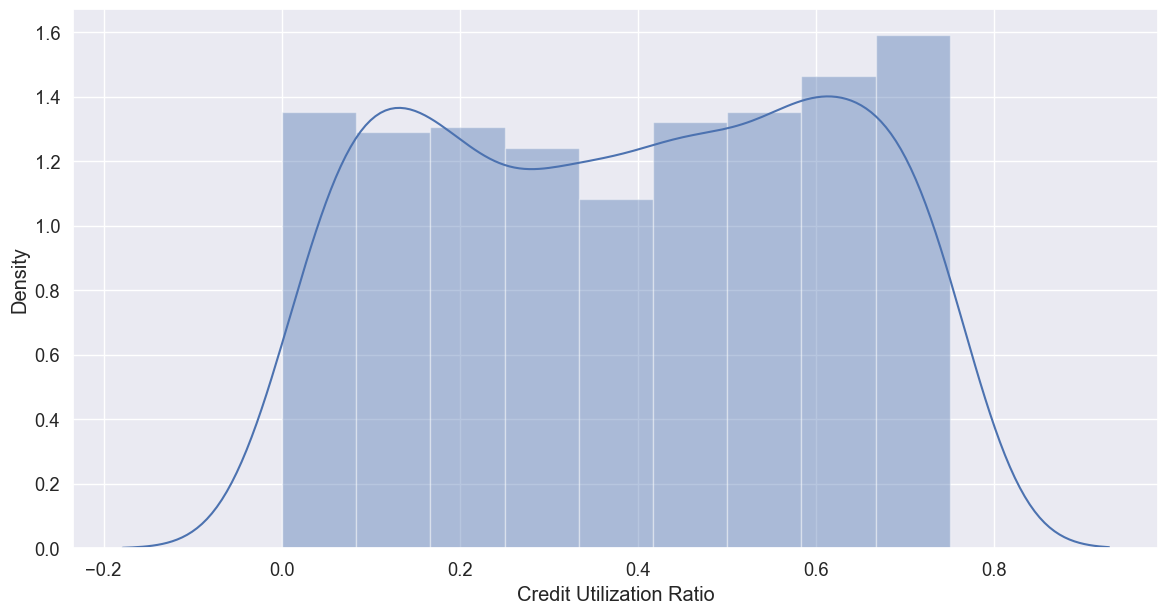

In [51]:
sns.distplot(filtered_credit_scoring_df['Credit Utilization Ratio']);

In [52]:
filtered_dummies = pd.get_dummies(filtered_credit_scoring_df)

In [53]:
filtered_dummies.head()

,Age,Credit Utilization Ratio,Payment History,Number of Credit Accounts,Loan Amount,Interest Rate,Loan Term,Gender_Female,Gender_Male,Marital Status_Divorced,...,Education Level_Bachelor,Education Level_High School,Education Level_Master,Education Level_PhD,Employment Status_Employed,Employment Status_Self-Employed,Employment Status_Unemployed,Type of Loan_Auto Loan,Type of Loan_Home Loan,Type of Loan_Personal Loan
0,60,0.22,2685,2,4675000,2.65,48,False,True,False,...,False,False,True,False,True,False,False,False,False,True
1,25,0.20,2371,9,3619000,5.19,60,False,True,False,...,False,True,False,False,False,False,True,True,False,False
2,30,0.22,2771,6,957000,2.76,12,True,False,False,...,False,False,True,False,True,False,False,True,False,False
3,58,0.12,1371,2,4731000,6.57,60,True,False,False,...,False,False,False,True,False,False,True,True,False,False
6,44,0.32,2800,1,2021000,16.61,36,True,False,True,...,True,False,False,False,False,False,True,True,False,False


In [54]:
X, y = filtered_dummies.drop('Credit Utilization Ratio',axis=1).values , filtered_dummies['Credit Utilization Ratio'] 

In [55]:
y.value_counts(normalize=True)

Credit Utilization Ratio
0.74    0.031830
0.66    0.023873
0.60    0.022546
0.45    0.021220
0.08    0.021220
          ...   
0.28    0.006631
0.09    0.006631
0.23    0.005305
0.00    0.003979
0.25    0.003979
Name: proportion, Length: 76, dtype: float64

In [56]:
y_data_rus.value_counts(normalize=True)

Credit Score
2    0.333333
1    0.333333
0    0.333333
Name: proportion, dtype: float64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_data_rus, y_data_rus, test_size=0.3, random_state=42,stratify=y_data_rus)

In [58]:
scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)

In [59]:
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

In [60]:
bagging = BaggingClassifier(n_jobs=-1)
extraTrees = ExtraTreesClassifier(max_depth=10, n_jobs=-1)
randomForest = RandomForestClassifier(n_jobs=-1)
histGradientBoosting = HistGradientBoostingClassifier()
XGB = xgb.XGBClassifier(n_jobs=-1)

model = StackingClassifier([
    ('bagging', bagging),
    ('extraTress', extraTrees),
    ('randomforest', randomForest),
    ('histGradientBoosting', histGradientBoosting),
    ('XGB', XGB)
], n_jobs=-1)

# When you call model.fit(X_train, y_train), the model is trained on the training data X_train with the corresponding labels y_train. The model adjusts its internal parameters during this process to minimize the difference between the actual labels and the predicted labels.

In [61]:
model.fit(X_train, y_train)

StackingClassifier(estimators=[('bagging', BaggingClassifier(n_jobs=-1)),
                               ('extraTress',
                                ExtraTreesClassifier(max_depth=10, n_jobs=-1)),
                               ('randomforest',
                                RandomForestClassifier(n_jobs=-1)),
                               ('histGradientBoosting',
                                HistGradientBoostingClassifier()),
                               ('XGB',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None...
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=-1,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   n_jobs=-1)

In [62]:
print("Train Score: ",model.score(X_train, y_train))

Train Score:  1.0


In [63]:
print("Test Score: ",model.score(X_test, y_test))

Test Score:  1.0


In [64]:
y_pred = model.predict(X_test)

# An accuracy rate of 1.0 (or 100%) in a confusion matrix means that the model has predicted all instances correctly. In other words, the model has made no mistakes in its predictions when compared to the actual values in the test dataset.

Here's a breakdown of the components of a confusion matrix in the context of accuracy:

True Positives (TP): The number of correct positive predictions.
True Negatives (TN): The number of correct negative predictions.
False Positives (FP): The number of incorrect positive predictions.
False Negatives (FN): The number of incorrect negative predictions.

When the accuracy rate is 1.0, it means that the sum of true positives and true negatives is equal to the total number of instances, indicating that the model has made no errors in its predictions.

In [65]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        34

    accuracy                           1.00       102
   macro avg       1.00      1.00      1.00       102
weighted avg       1.00      1.00      1.00       102



In [66]:
cf_test_matrix = confusion_matrix(y_test, y_pred)
cf_test_matrix  

array([[34,  0,  0],
       [ 0, 34,  0],
       [ 0,  0, 34]], dtype=int64)

Data Visualizations 

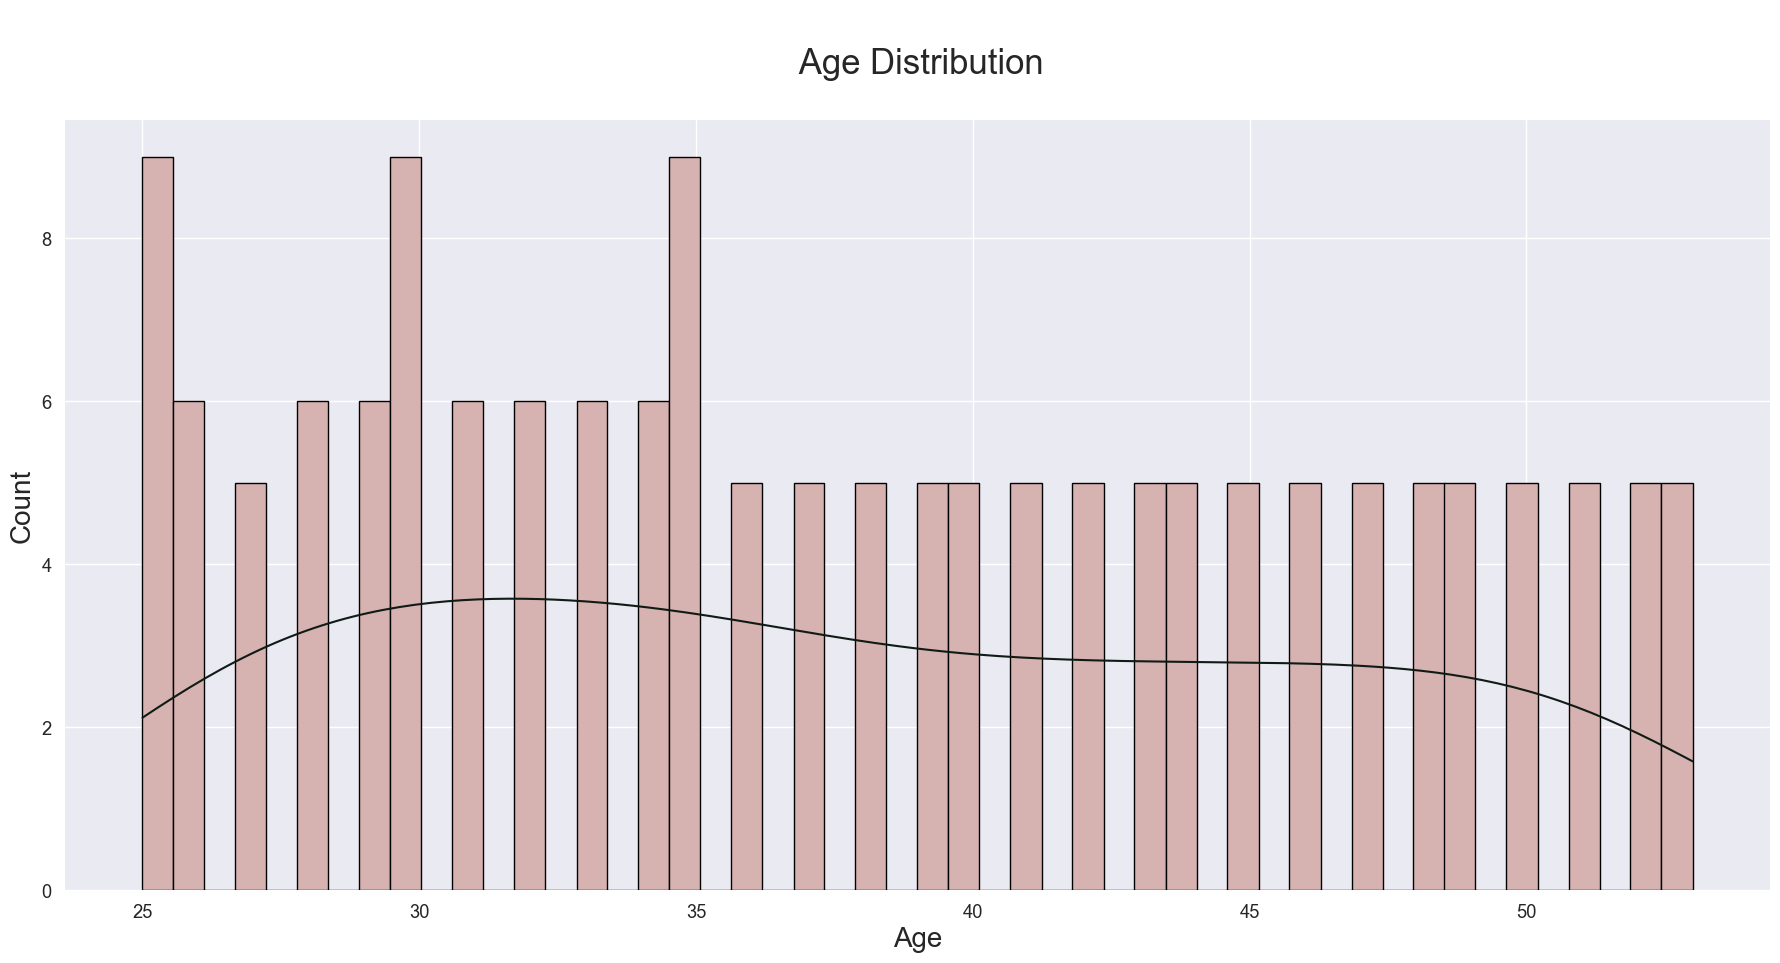

In [67]:
plt.subplots(figsize=(22, 10))
p = sns.histplot(credit_class_df["Age"],color="#D6B2B1",kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.set_title("\n Age Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Age",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

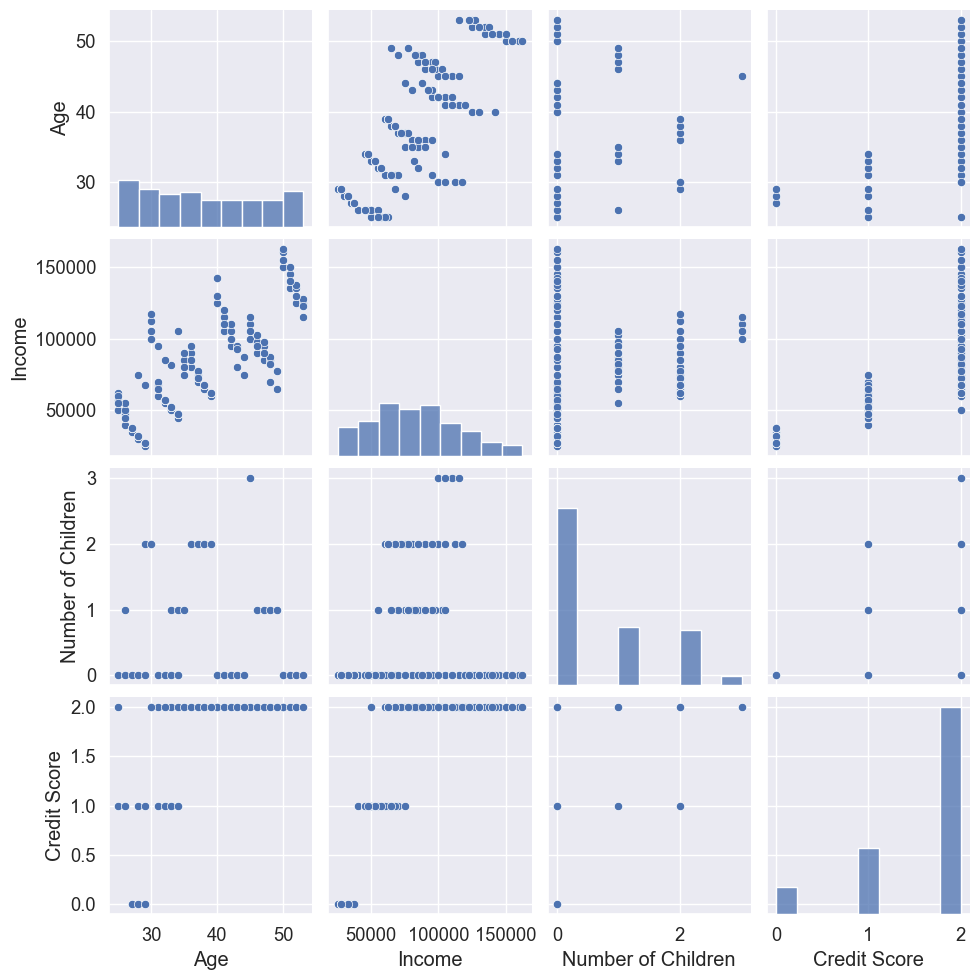

In [68]:
sns.pairplot(credit_class_df)

# The relationship between a high credit score and home ownership is significant and can impact various aspects of the home buying process. Here are some key points to consider when exploring this relationship:

Access to Mortgage Loans: A high credit score is often a crucial factor in qualifying for a mortgage loan. Lenders use credit scores to assess the creditworthiness of borrowers. Individuals with high credit scores are more likely to qualify for competitive interest rates and mortgage options, making home ownership more accessible.

Lower Interest Rates: Borrowers with high credit scores are typically offered lower interest rates on mortgage loans. This can result in significant savings over the life of the loan and make home ownership more affordable in the long run.

Higher Loan Approval Rates: Lenders may be more willing to approve mortgage applications from individuals with high credit scores due to their demonstrated ability to manage credit responsibly. This can streamline the home buying process and increase the chances of loan approval.

Better Terms and Conditions: Borrowers with high credit scores may have more negotiating power when it comes to loan terms and conditions. They may be able to negotiate favorable terms, such as lower down payments or reduced closing costs, which can facilitate the home buying process.

Overall Financial Stability: A high credit score is often indicative of financial responsibility and stability. Home ownership requires financial commitment and stability to manage mortgage payments, property taxes, insurance, and maintenance costs. Individuals with high credit scores are more likely to demonstrate the financial discipline needed for successful home ownership.

Building Wealth: Home ownership is often considered a key component of wealth-building. Individuals with high credit scores who are able to purchase a home may benefit from potential property appreciation and equity accumulation over time, contributing to their overall financial well-being.

Text(0.5, 1.0, 'Distribution of Credit Scores by Home Ownership')

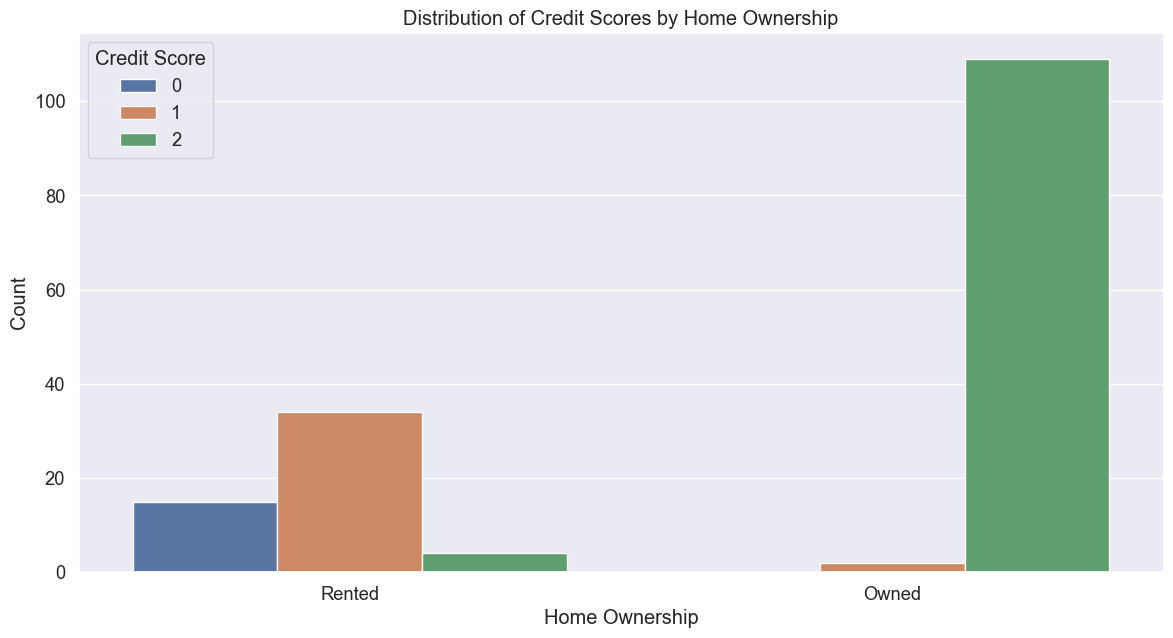

In [69]:
sns.countplot(x='Home Ownership', hue='Credit Score', data=credit_class_df)
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Credit Scores by Home Ownership')


Text(0.5, 1.0, 'Distribution of Credit Scores by Income and Education')

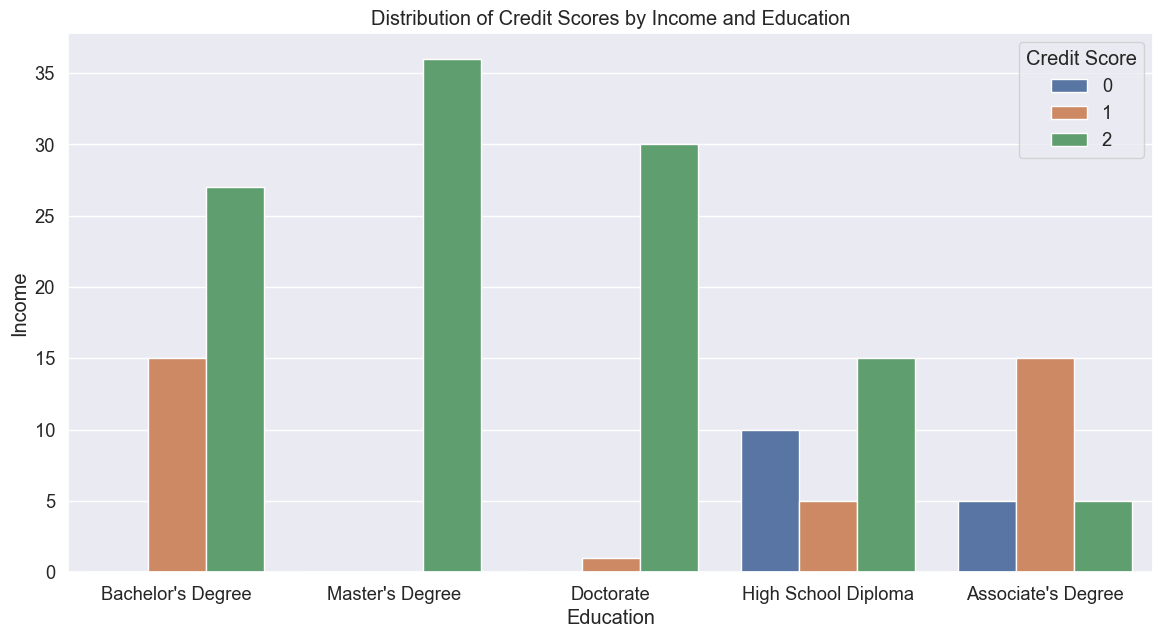

In [80]:
sns.countplot(x='Education', hue='Credit Score', data=credit_class_df)
plt.xlabel('Education')
plt.ylabel('Income')
plt.title('Distribution of Credit Scores by Income and Education')

# Analyzing the relationship between marital status and credit score can be an interesting study in the context of credit risk assessment. Here are some general observations on how marital status might relate to credit scores:

Joint Accounts: Married individuals may have joint accounts with their spouses, which can impact their credit scores. If both partners manage their finances responsibly, it can lead to a higher credit score due to combined financial stability.

Financial Responsibility: Being married may indicate a level of financial stability and responsibility, as individuals may have shared financial goals and obligations. This shared responsibility can positively impact credit scores.

Credit Utilization: Married individuals may have higher household incomes, allowing for better credit utilization and repayment of debts. This can result in a positive impact on credit scores.

Credit History: Marital status can also influence the length of credit history. Couples who have been married for a longer period may have a longer credit history, which can positively impact credit scores.

Divorce and Separation: On the other hand, divorce or separation can lead to financial challenges, including dividing assets and debts. This transition can potentially impact credit scores negatively if not managed properly.

Single Individuals: Single individuals may have different financial priorities and responsibilities compared to married individuals. This can influence their credit behavior and credit scores.

Text(0.5, 1.0, 'Distribution of Credit Scores by Martial Status and Income')

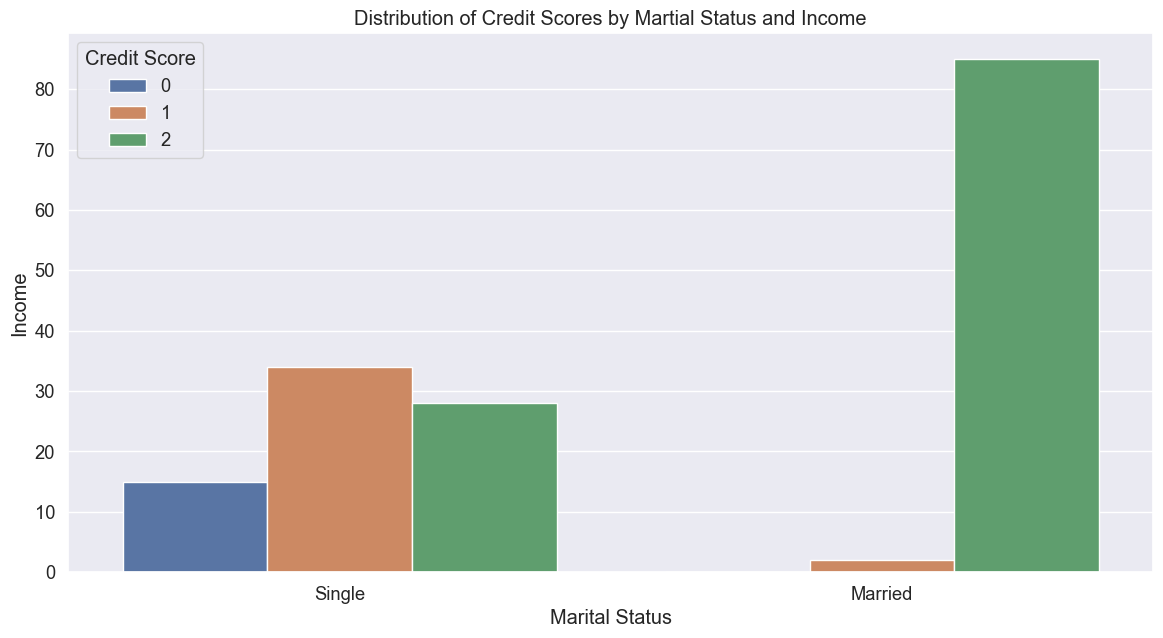

In [81]:
sns.countplot(x='Marital Status', hue='Credit Score', data=credit_class_df)
plt.xlabel('Marital Status')
plt.ylabel('Income')
plt.title('Distribution of Credit Scores by Martial Status and Income')

In [82]:
credit_scoring_df
sns.countplot(x='Payment History', hue='Education level', data=credit_scoring_df)
plt.xlabel('Payment History')
plt.ylabel('Number of Credit accounts')
plt.title('Distribution of Credit Scores by Martial Status and Income')

ValueError: Could not interpret input 'Education level'

<Axes: xlabel='Age', ylabel='Income'>

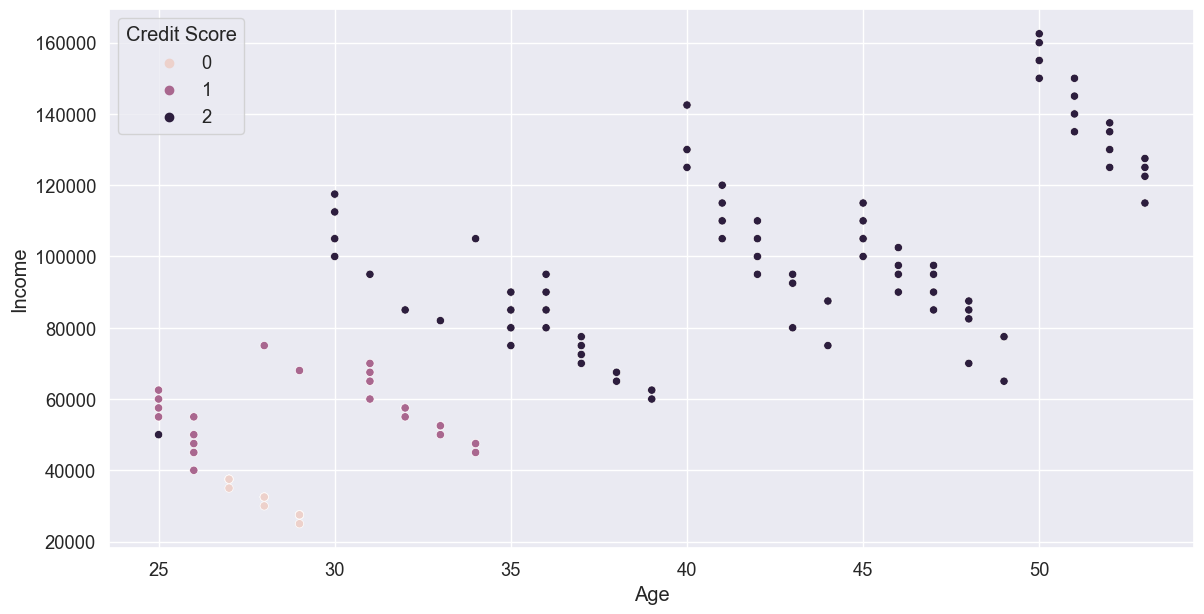

In [71]:
sns.scatterplot(x=credit_class_df['Age'], y=credit_class_df['Income'], hue=credit_class_df['Credit Score'])

<Axes: xlabel='Age', ylabel='Income'>

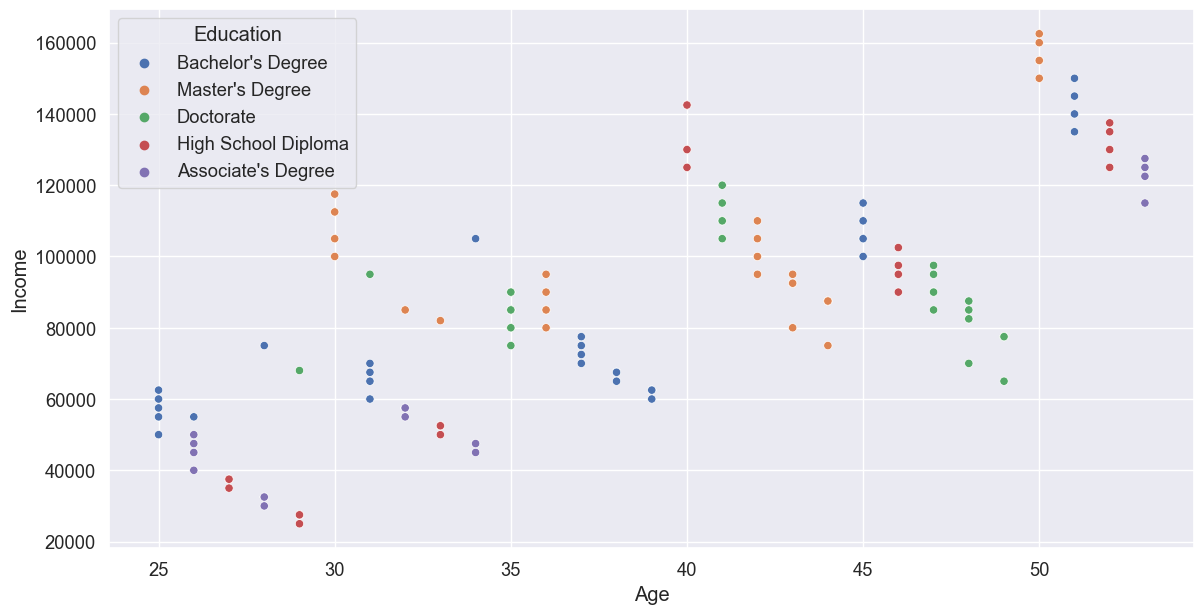

In [72]:
sns.scatterplot(x=credit_class_df['Age'], y=credit_class_df['Income'], hue=credit_class_df['Education'])

In [73]:
#Rename the test dateFrame columns: Credit_Utilization_Ratio, Interest_Rate, Num_of_Loan, Annual_Income
test_df.rename(columns = {'Credit_Utilization_Ratio':'Credit Utilization Ratio',
                         'Interest_Rate':'Interest Rate',
                         'Type_of_Loan':'Loan Intent',
                         'Num_of_Loan':'Loan Accounts',
                         'Annual_Income':'Annual Income',                          
                         }, inplace=True)

#Rename credit risk columns: person_income, loan_int_rate, loan_intent
credit_df.rename(columns = {'person_income':'Annual Income',
                           'person_age':'Age',
                            'loan_int_rate':'Interest Rate',
                           'loan_intent':'Loan Intent',                 
                           }, inplace=True)

#Rename credit risk columns: person_income, Education Level, Type of Loan
credit_scoring_df.rename(columns = {'Education Level':'Occupation',
                                    'Type of Loan':'Loan Intent',
                                   }, inplace=True)

In [74]:
test_dfc = test_df
credit_dfc = credit_df
credit_scoring_dfc = credit_scoring_df

In [75]:
test_dfc = test_df.drop(columns=['ID','Customer_ID', 'Month','Loan Accounts','Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Delay_from_due_date','Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'])
credit_dfc = credit_df.drop(columns=['person_home_ownership','person_emp_length','loan_grade','loan_amnt','loan_status','cb_person_default_on_file','cb_person_cred_hist_length'])
credit_scoring_dfc = credit_scoring_df.drop(columns=['Gender','Marital Status','Payment History','Number of Credit Accounts','Loan Amount','Loan Term'])

In [76]:
#merge the DataFrames
half_concat = pd.concat([credit_dfc,test_dfc], axis=0)
full_concat = pd.concat([half_concat,credit_scoring_dfc], axis=0)

In [77]:
full_concat = full_concat.dropna(subset=['Credit Utilization Ratio'])
full_concat.head()

,Age,Annual_Income,Loan Intent,Interest_Rate,loan_percent_income,Name,SSN,Occupation,Annual Income,Interest Rate,Credit Utilization Ratio,Employment Status
0,23,NaN,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,NaN,Aaron Maashoh,821-00-0265,Scientist,19114.12,3.0,35.030402,NaN
1,24,NaN,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,NaN,Aaron Maashoh,821-00-0265,Scientist,19114.12,3.0,33.053114,NaN
4,28,NaN,Credit-Builder Loan,NaN,NaN,Rick Rothackerj,004-07-5839,_______,34847.84,6.0,25.926822,NaN
5,28,NaN,Credit-Builder Loan,NaN,NaN,Rick Rothackerj,#F%$D@*&8,Teacher,34847.84,6.0,30.116600,NaN
7,28,NaN,Credit-Builder Loan,NaN,NaN,Rick Rothackerj,004-07-5839,Teacher,34847.84,6.0,33.875167,NaN


In [78]:
full_concat.dropna(axis= 1, inplace=True)

In [79]:
full_concat.head()

,Age,Loan Intent,Occupation,Interest Rate,Credit Utilization Ratio
0,23,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Scientist,3.0,35.030402
1,24,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Scientist,3.0,33.053114
4,28,Credit-Builder Loan,_______,6.0,25.926822
5,28,Credit-Builder Loan,Teacher,6.0,30.116600
7,28,Credit-Builder Loan,Teacher,6.0,33.875167


In [89]:
full_concat.columns

Index(['Age', 'Loan Intent', 'Occupation', 'Interest Rate',
       'Credit Utilization Ratio'],
      dtype='object')

In [90]:
full_concat['Occupation']

0        Scientist
1        Scientist
4          _______
5          Teacher
7          Teacher
          ...     
995    High School
996       Bachelor
997         Master
998            PhD
999         Master
Name: Occupation, Length: 27459, dtype: object

In [91]:
column_list = full_concat['Occupation'].tolist()

In [92]:
print(column_list)

['Scientist', 'Scientist', '_______', 'Teacher', 'Teacher', 'Engineer', 'Entrepreneur', 'Entrepreneur', 'Entrepreneur', 'Entrepreneur', 'Lawyer', 'Lawyer', 'Media_Manager', 'Media_Manager', 'Doctor', 'Doctor', 'Journalist', 'Journalist', 'Teacher', 'Teacher', 'Engineer', 'Entrepreneur', 'Entrepreneur', '_______', 'Entrepreneur', '_______', 'Entrepreneur', 'Scientist', 'Scientist', '_______', 'Teacher', '_______', 'Entrepreneur', 'Entrepreneur', 'Media_Manager', 'Media_Manager', 'Media_Manager', 'Media_Manager', 'Lawyer', 'Lawyer', 'Lawyer', 'Mechanic', 'Entrepreneur', 'Entrepreneur', 'Entrepreneur', 'Writer', 'Writer', 'Writer', 'Writer', 'Accountant', 'Accountant', 'Architect', 'Architect', 'Architect', 'Manager', 'Manager', 'Scientist', '_______', 'Scientist', 'Musician', 'Musician', 'Musician', 'Engineer', 'Engineer', 'Engineer', 'Writer', '_______', 'Writer', 'Scientist', '_______', 'Manager', 'Manager', 'Mechanic', 'Mechanic', 'Engineer', 'Engineer', 'Musician', 'Musician', 'Music

In [93]:
unique_values_list = full_concat['Occupation'].unique().tolist()

In [94]:
print(unique_values_list)

['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Mechanic', 'Writer', 'Accountant', 'Architect', 'Manager', 'Musician', 'Developer', 'Master', 'High School', 'PhD', 'Bachelor']


In [ ]:
labels = column_list
sizes = [1] * len(column_list)

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()